In [1]:
# dependencies
import os
import sys
import copy
import numpy as np
import pandas as pd
import geopandas as gpd
import pyvista as pv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style("dark")
# sns.set_style("whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
mpl.rcParams['lines.linewidth'] = 3

In [2]:
from dolfin import *

# Load Texas map with outer boundary

In [3]:
texas_shp = gpd.read_file("data/shp/map.shp")
# print(texas_shp)

In [4]:
texas_geom = texas_shp['geometry']
# texas_geom.plot()
# texas_geom.head()

In [5]:
texas_poly = texas_geom[0]
x, y = texas_poly.exterior.coords.xy
x = np.array(x)
y = np.array(y)

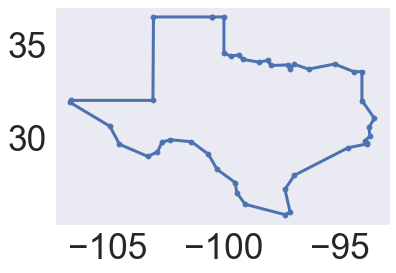

In [6]:
plt.plot(x,y,marker='o')
plt.show()

In [7]:
def create_geo_file(filename, x, y, mesh_size):
    # create .geo file for gmsh
    geof = open(filename+'.geo','w')
    geof.write("cl__1 = 1;\n")
    geof.write("Mesh.MshFileVersion = 2.2;\n")

    # print points
    N = len(x)
    for i in range(N):
        geof.write('Point({}) = {{{}, {}, 0., {}}};\n'.format(i+1, x[i], y[i], mesh_size))

    # print lines
    for i in range(N-1):
        geof.write('Line({}) = {{{},{}}};\n'.format(i+1, i+1, i+2))

    geof.write('Line({}) = {{{},{}}};\n'.format(N, N, 1))

    # define polygon surface
    geof.write('Line Loop(1) = {')
    for i in range(N-1):
        geof.write('{},'.format(i+1))
    geof.write('{}'.format(N))
    geof.write('};\n')
    geof.write('Plane Surface(1) = {1};\n')
    tag = '"' + "a" + '"'
    geof.write('Physical Surface({}) = {{1}};\n'.format(tag))
    geof.close()

In [8]:
# create a array excluding last (x,y) which is equal to first in shapefile
X = x[:-1]
Y = y[:-1]

In [9]:
# get minimum of length of lines in polygon
def get_min_length(x,y):
    min_length = 1000.
    for i in range(len(x)-1):
        d = (x[i+1] - x[i])*(x[i+1] - x[i]) + (y[i+1] - y[i])*(y[i+1] - y[i])
        d = np.sqrt(d)
        if min_length > d:
            min_length = d

    return min_length
      
min_length = get_min_length(X,Y)
print('Minimum length of line: {}'.format(min_length))

Minimum length of line: 0.036659810835579794


In [10]:
create_geo_file('data/mesh/mesh_10h', X, Y, 10. * min_length)
!gmsh 'data/mesh/mesh_10h'.geo -2
!gmsh 'data/mesh/mesh_10h'.geo -2 -o 'data/mesh/mesh_10h'.vtk
!dolfin-convert 'data/mesh/mesh_10h'.msh 'data/mesh/mesh_10h'.xml

Info    : Running 'gmsh data/mesh/mesh_10h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:21 2020
Info    : Reading 'data/mesh/mesh_10h.geo'...
Info    : Done reading 'data/mesh/mesh_10h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
In

In [11]:
create_geo_file('data/mesh/mesh_15h', X, Y, 15. * min_length)
!gmsh 'data/mesh/mesh_15h'.geo -2
!gmsh 'data/mesh/mesh_15h'.geo -2 -o 'data/mesh/mesh_15h'.vtk
!dolfin-convert 'data/mesh/mesh_15h'.msh 'data/mesh/mesh_15h'.xml

Info    : Running 'gmsh data/mesh/mesh_15h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:22 2020
Info    : Reading 'data/mesh/mesh_15h.geo'...
Info    : Done reading 'data/mesh/mesh_15h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
In

In [12]:
create_geo_file('data/mesh/mesh_20h', X, Y, 20. * min_length)
!gmsh 'data/mesh/mesh_20h'.geo -2
!gmsh 'data/mesh/mesh_20h'.geo -2 -o 'data/mesh/mesh_20h'.vtk
!dolfin-convert 'data/mesh/mesh_20h'.msh 'data/mesh/mesh_20h'.xml

Info    : Running 'gmsh data/mesh/mesh_20h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:22 2020
Info    : Reading 'data/mesh/mesh_20h.geo'...
Info    : Done reading 'data/mesh/mesh_20h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
In

In [13]:
create_geo_file('data/mesh/mesh_5h', X, Y, 5. * min_length)
!gmsh 'data/mesh/mesh_5h'.geo -2
!gmsh 'data/mesh/mesh_5h'.geo -2 -o 'data/mesh/mesh_5h'.vtk
!dolfin-convert 'data/mesh/mesh_5h'.msh 'data/mesh/mesh_5h'.xml

Info    : Running 'gmsh data/mesh/mesh_5h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:23 2020
Info    : Reading 'data/mesh/mesh_5h.geo'...
Info    : Done reading 'data/mesh/mesh_5h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
Info 

In [14]:
create_geo_file('data/mesh/mesh_4h', X, Y, 4. * min_length)
!gmsh 'data/mesh/mesh_4h'.geo -2
!gmsh 'data/mesh/mesh_4h'.geo -2 -o 'data/mesh/mesh_4h'.vtk
!dolfin-convert 'data/mesh/mesh_4h'.msh 'data/mesh/mesh_4h'.xml

Info    : Running 'gmsh data/mesh/mesh_4h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:24 2020
Info    : Reading 'data/mesh/mesh_4h.geo'...
Info    : Done reading 'data/mesh/mesh_4h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
Info 

In [15]:
create_geo_file('data/mesh/mesh_2h', X, Y, 2. * min_length)
!gmsh 'data/mesh/mesh_2h'.geo -2
!gmsh 'data/mesh/mesh_2h'.geo -2 -o 'data/mesh/mesh_2h'.vtk
!dolfin-convert 'data/mesh/mesh_2h'.msh 'data/mesh/mesh_2h'.xml

Info    : Running 'gmsh data/mesh/mesh_2h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:25 2020
Info    : Reading 'data/mesh/mesh_2h.geo'...
Info    : Done reading 'data/mesh/mesh_2h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
Info 

In [16]:
create_geo_file('data/mesh/mesh_h', X, Y, 1. * min_length)
!gmsh 'data/mesh/mesh_h'.geo -2
!gmsh 'data/mesh/mesh_h'.geo -2 -o 'data/mesh/mesh_h'.vtk
!dolfin-convert 'data/mesh/mesh_h'.msh 'data/mesh/mesh_h'.xml

Info    : Running 'gmsh data/mesh/mesh_h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Wed Jun 24 20:06:27 2020
Info    : Reading 'data/mesh/mesh_h.geo'...
Info    : Done reading 'data/mesh/mesh_h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)
Info    

In [10]:
create_geo_file('data/mesh/mesh_0.5h', X, Y, 0.5 * min_length)
!gmsh 'data/mesh/mesh_0.5h'.geo -2
!gmsh 'data/mesh/mesh_0.5h'.geo -2 -o 'data/mesh/mesh_0.5h'.vtk
!dolfin-convert 'data/mesh/mesh_0.5h'.msh 'data/mesh/mesh_0.5h'.xml

Info    : Running 'gmsh data/mesh/mesh_0.5h.geo -2' [Gmsh 4.5.5, 1 node, max. 1 thread]
Info    : Started on Mon Jul 13 09:54:51 2020
Info    : Reading 'data/mesh/mesh_0.5h.geo'...
Info    : Done reading 'data/mesh/mesh_0.5h.geo'
Info    : Meshing 1D...
Info    : [  0 %] Meshing curve 1 (Line)
Info    : [ 10 %] Meshing curve 2 (Line)
Info    : [ 10 %] Meshing curve 3 (Line)
Info    : [ 10 %] Meshing curve 4 (Line)
Info    : [ 10 %] Meshing curve 5 (Line)
Info    : [ 20 %] Meshing curve 6 (Line)
Info    : [ 20 %] Meshing curve 7 (Line)
Info    : [ 20 %] Meshing curve 8 (Line)
Info    : [ 20 %] Meshing curve 9 (Line)
Info    : [ 20 %] Meshing curve 10 (Line)
Info    : [ 30 %] Meshing curve 11 (Line)
Info    : [ 30 %] Meshing curve 12 (Line)
Info    : [ 30 %] Meshing curve 13 (Line)
Info    : [ 30 %] Meshing curve 14 (Line)
Info    : [ 40 %] Meshing curve 15 (Line)
Info    : [ 40 %] Meshing curve 16 (Line)
Info    : [ 40 %] Meshing curve 17 (Line)
Info    : [ 40 %] Meshing curve 18 (Line)

# find max and min range of map

In [11]:
x_min = np.min(X)
x_max = np.max(X)

y_min = np.min(Y)
y_max = np.max(Y)

print('min: {0} max: {1}'.format([x_min, y_min], [x_max, y_max]))

min: [-106.64622979299997, 25.839744319000033] max: [-93.50780658299999, 36.50038606900006]


In [19]:
W = x_max - x_min
L = y_max - y_min

print('W: {}  L: {}  WL: {}'.format(W,L, W*L))

W: 13.138423209999985  L: 10.660641750000025  WL: 140.06402300169518


In [20]:
texas_area_approx = 0.5*W*L
texas_area_approx

70.03201150084759

In [22]:
texas_area_km = 696200. #km^2
texas_area_100km = texas_area_km / (100. * 100.)

print('area([km]^2): {0:<10} area([100km]^2): {1:<10} area approx: {2}'.format(texas_area_km, 
                                        texas_area_100km, texas_area_approx))

area([km]^2): 696200.0   area([100km]^2): 69.62      area approx: 70.03201150084759
